In [2]:
import gensim
import re
import matplotlib.pyplot as plt
from gensim.models import Phrases
from textblob import TextBlob
from nltk.tokenize import sent_tokenize
import multiprocessing
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import pandas as pd
from pandas import DataFrame as df
from mpld3 import plugins, fig_to_html, save_html, fig_to_dict
from tqdm import tqdm
import numpy as np
import json
from tensorflow.keras.preprocessing.text import text_to_word_sequence

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cacki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cacki\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
text = """A window into the soul.For most people, this would be the eyes. The eyes cannot lie; they often tell more about a person's emotions than their words. What distinguishes a fake smile from a genuine one? The eyes. What shows sadness? The eyes. What gives away a liar? The eyes.But are the eyes the only window into the soul?Recently, I began painting with watercolors. With watercolors, there is no turning back: if one section is too dark, it is nearly impossible to lighten the area again. Every stroke must be done purposefully, every color mixed to its exact value.I laid my materials before me, preparing myself for the worst. I checked my list of supplies, making sure my setup was perfect.I wet my brush, dipped it into some yellow ochre, and dabbed off the excess paint. Too little water on my brush. I dipped my brush back into my trusty water jar; the colors swirled beautifully, forming an abstract art piece before my eyes. \u2014It's a shame that I couldn't appreciate it.I continued mixing colors to their exact value. More alizarin crimson. More water. More yellow ochre. Less water. More phthalo blue. The cycle continued. Eventually, I was satisfied. The colors looked good, there was enough contrast between facial features, and the watercolors stayed inside the lines.Craving feedback, I posted my art to Snapchat. I got a few messages such as 'wow' and 'pretty,' but one message stood out. 'You were anxious with this one, huh? Anyways, love the hair!'I was caught off guard. Was it a lucky guess? Did they know something I didn't? I immediately responded: 'Haha, how could you tell?' No response.What I didn't know at the time was that my response would come a few months later while babysitting. Since the girl I was babysitting loved art, I took out some Crayola watercolors and some watercolor paper for her to play with. After I went to the bathroom and came back, the watercolors were doused with water. 'You were impatient with this one, huh? Anyways, love the little dog you drew!'The little girl looked up at me, confused. 'How could you tell?' 'You used a lot of water for a brighter color, but you couldn't wait for it to slowly soak in.''Oh.'Now, I would be lying if I said I realized the connection between the two events immediately.Instead, I made the connection when I decided to sit down one day and objectively critique my art. The piece that I once loved now seemed like a nervous wreck: the paper was overworked, the brushstrokes were undecided, the facial features blended together, and each drop of water was bound inside the lines as if it was a prisoner in a cage.From then on, I started noticing pieces of personality in additional creations surrounding me: website designs, solutions to math problems, code written for class, and even the preparation of a meal.When I peer around at people's projects during Code Club, I notice the clear differences between their code. Some people break it up by commenting in every possible section. Others breeze through the project, not caring to comment or organize their code. I could also see clear differences in personalities when our club members began coding the Arduino for the first time. Some followed the tutorials to the letter, while others immediately started experimenting with different colored LEDs and ways of wiring the circuit.It became clear to me that, as humans, we leave pieces of our souls in everything we do, more than we intend to. If we entertain this thought, perhaps the key to better understanding others around us is simply noticing the subtler clues under our noses?Perhaps there are endless windows to the soul, and we simply need to peer through them. I shakily rose my hand. 'We should create workshops of our own,' I suggested.I got a few strange looks. 'It's a good idea, but it's too much work.' 'We just don't have enough free time to make it work.' 'Maybe we could, but I don't know how to make workshops.' My suggestion was shot down. I shuffled in my seat. 'I could make them.' A few people stared at me in disbelief. I glanced over at the club advisor, Mr. C, nervous to hear his response.'If you're willing to take on the work, we can try it.' Mr. C replied. And so I embarked on my quest. I researched different workshops on the internet, learning the information myself at first. Then, I transitioned into creating workshops of my own, making sure that the information was easy to understand for even a beginner. I was exhausted; my first workshop took 16 cumulative hours to create."""


In [4]:
def ext_sim_words(text):

    essay_input_corpus = str(text)

    sentences  = sent_tokenize(essay_input_corpus)

    split_sentences = []
    for sentence in sentences:
        processed = re.sub("[^a-zA-Z]"," ", sentence)
        words = processed.split()
        split_sentences.append(words)

    skip_gram = 1
    workers = multiprocessing.cpu_count()
    bigram_transformer = Phrases(split_sentences)

    model = gensim.models.word2vec.Word2Vec(bigram_transformer[split_sentences], workers=workers, sg=skip_gram, min_count=5)

    model.train(split_sentences, total_examples=sum([len(sentence) for sentence in sentences]), epochs=100)

    #conflict words list와 유사한 단어를 모두 추출
    
    ext_sim_words_key = model.most_similar_cosmul('I')
    
    

    return ext_sim_words_key

In [5]:
#명사추출

tokenized = nltk.word_tokenize(text)
input_tex_ = [word for (word, pos) in nltk.pos_tag(tokenized) if(pos[:2] == 'NN')]
print (input_tex_ )

['window', 'soul.For', 'people', 'eyes', 'eyes', 'person', 'emotions', 'words', 'smile', 'eyes', 'sadness', 'eyes', 'liar', 'eyes.But', 'eyes', 'window', 'soul', 'watercolors', 'watercolors', 'section', 'area', 'Every', 'stroke', 'color', 'value.I', 'materials', 'list', 'supplies', 'setup', 'brush', 'ochre', 'paint', 'Too', 'water', 'brush', 'brush', 'water', 'jar', 'colors', 'art', 'piece', 'eyes', '—It', 'shame', 'colors', 'value', 'crimson', 'water', 'ochre', 'Less', 'water', 'blue', 'cycle', 'colors', 'contrast', 'features', 'watercolors', 'feedback', 'art', 'Snapchat', 'messages', "'wow", 'message', "'You", 'huh', 'Anyways', 'hair', 'guard', 'guess', 'Did', 'something', "'Haha", 'response.What', 'time', 'response', 'months', 'girl', 'art', 'Crayola', 'watercolors', 'paper', 'bathroom', 'watercolors', 'water', 'huh', 'Anyways', 'dog', 'girl', 'lot', 'water', 'brighter', 'color', 'in.', 'Oh', 'connection', 'events', 'connection', 'day', 'art', 'piece', 'wreck', 'paper', 'brushstroke

In [6]:
def conflict_risingaction_anaysis(text):

    essay_input_corpus = str(text) #문장입력
    essay_input_corpus = essay_input_corpus.lower()#소문자 변환

    sentences  = sent_tokenize(essay_input_corpus) #문장 토큰화
    total_sentences = len(sentences)#토큰으로 처리된 총 문장 수
    total_words = len(word_tokenize(essay_input_corpus))# 총 단어수
    split_sentences = []
    for sentence in sentences:
        processed = re.sub("[^a-zA-Z]"," ", sentence)
        words = processed.split()
        split_sentences.append(words)

    skip_gram = 1
    workers = multiprocessing.cpu_count()
    bigram_transformer = Phrases(split_sentences)

    model = gensim.models.word2vec.Word2Vec(bigram_transformer[split_sentences], workers=workers, sg=skip_gram, min_count=1)

    model.train(split_sentences, total_examples=sum([len(sentence) for sentence in sentences]), epochs=100)
    
    #모델 설계 완료

    #conflict을 표현하는 단어들을 리스트에 넣어서 필터로 만들고
    confict_words_list = ['clash', 'incompatible', 'inconsistent', 'incongruous', 'opposition', 'variance','vary', 'odds', 
                            'differ', 'diverge', 'disagree', 'contrast', 'collide', 'contradictory', 'incompatible', 'conflict',
                            'inconsistent','irreconcilable','incongruous','contrary','opposite','opposing','opposed',
                            'antithetical','clashing','discordant','differing','different','divergent','discrepant',
                            'varying','disagreeing','contrasting','at odds','in opposition','at variance' ]
    
    
    conflict_words_filter_list = confict_words_list
    
    ####문장에 conflict_words_filter_list의 단어들이 있는지 확인하고, 있다면 유사단어를 추출한다.
    #우선 토큰화한다.
    retokenize = RegexpTokenizer("[\w]+") #줄바꿈 제거하여 한줄로 만들고
    token_input_text = retokenize.tokenize(essay_input_corpus)
    #print (token_input_text) #토큰화 처리 확인.. 토큰들이 리스트에 담김
    #리트스로 정리된 개별 토큰을 char_list와 비교해서 존재하는 것만 추출한다.
    filtered_setting_text = []
    for k in token_input_text:
        for j in conflict_words_filter_list:
            if k == j:
                filtered_setting_text.append(j)
    
    #print (filtered_chr_text) # 유사단어 비교 추출 완료, 겹치는 단어는 제거하자.
    
    filtered_setting_text_ = set(filtered_setting_text) #중복제거
    filtered_setting_text__ = list(filtered_setting_text_) #다시 리스트로 변환
    print (filtered_setting_text__) # 중복값 제거 확인
    
    for i in filtered_setting_text__:
        ext_setting_sim_words_key = model.most_similar_cosmul(i) #모델적용
    
    setting_total_count = len(filtered_setting_text) # 중복이 제거되지 않은 에세이 총 문장에 사용된 conflict 표현 수
    setting_count_ = len(filtered_setting_text__) #중복제거된 conflict 표현 총 수
        
    result_setting_words_ratio = round(setting_total_count/total_words * 100, 2)
    return result_setting_words_ratio, total_sentences, total_words, setting_total_count, setting_count_, filtered_setting_text, ext_setting_sim_words_key

In [7]:
conflict_risingaction_anaysis(text)

['different', 'contrast']


C:\Users\cacki\anaconda3\envs\py37pytorch\lib\site-packages\ipykernel_launcher.py:54: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).


(0.32,
 60,
 932,
 3,
 2,
 ['contrast', 'different', 'different'],
 [('blended', 0.9779380559921265),
  ('stayed', 0.9774392247200012),
  ('together', 0.976315975189209),
  ('undecided', 0.973942756652832),
  ('facial', 0.9718605279922485),
  ('each', 0.9709219932556152),
  ('features', 0.9678682088851929),
  ('brushstrokes', 0.9662232995033264),
  ('drop', 0.9626554846763611),
  ('overworked', 0.9551054835319519)])

In [8]:
df = conflict_risingaction_anaysis(text)
df_ = pd.DataFrame(df, index = [
                                'conflict ratio','total sentences', 'toral words', 'conflict_total_count',
                                'ext_conflict_words_no', 'conflict words', 'ext_conflict_sim_words_samples'
                                ], columns = ['Value']
                  )
                     
df_ # 이 겨래과에서는 92라는 숫자만 의미가 있지 >>> 총 문장에 conflict를 표현한 수가 총 몇개인지 추출한 결과

['different', 'contrast']


C:\Users\cacki\anaconda3\envs\py37pytorch\lib\site-packages\ipykernel_launcher.py:54: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).


,Value
conflict ratio,0.32
total sentences,60
toral words,932
conflict_total_count,3
ext_conflict_words_no,2
conflict words,"[contrast, different, different]"
ext_conflict_sim_words_samples,"[(blended, 0.9779380559921265), (stayed, 0.977..."


In [9]:
# 위 결과에서 Conflict 단어만 추출
df_.index = ['0','1','2','3','4','5','6']
df = df_.iloc[['5','6']]
df

,Value
5,"[contrast, different, different]"
6,"[(blended, 0.9779380559921265), (stayed, 0.977..."


In [10]:
#df to list
list_conf = df.values.tolist()
str_list_conf = str(list_conf)
str_list_conf

"[[['contrast', 'different', 'different']], [[('blended', 0.9779380559921265), ('stayed', 0.9774392247200012), ('together', 0.976315975189209), ('undecided', 0.973942756652832), ('facial', 0.9718605279922485), ('each', 0.9709219932556152), ('features', 0.9678682088851929), ('brushstrokes', 0.9662232995033264), ('drop', 0.9626554846763611), ('overworked', 0.9551054835319519)]]]"

In [11]:
words = re.findall('\w+', str_list_conf)
conf_words = list(filter(lambda w: len(w) > 1, words))
conf_words #conflict와 관련된 단어 추출

['contrast',
 'different',
 'different',
 'blended',
 '9779380559921265',
 'stayed',
 '9774392247200012',
 'together',
 '976315975189209',
 'undecided',
 '973942756652832',
 'facial',
 '9718605279922485',
 'each',
 '9709219932556152',
 'features',
 '9678682088851929',
 'brushstrokes',
 '9662232995033264',
 'drop',
 '9626554846763611',
 'overworked',
 '9551054835319519']

In [12]:
#이 단어가 문장의 어디에 위치해 있는지 찾아내어 그래프에 점으로 표시
#문장을 .로 구분하고 데이터프레임으로 전환

In [13]:
import spacy
import re

nlp = spacy.load('en_core_web_lg')
boundary = re.compile('^[0-9]$')

def custom_seg(doc):
    prev = doc[0].text
    length = len(doc)
    for index, token in enumerate(doc):
        if (token.text == '.' and boundary.match(prev) and index!=(length - 1)):
            doc[index+1].sent_start = False
        prev = token.text
    return doc

nlp.add_pipe(custom_seg, before='parser')

In [14]:
doc = nlp(text)
# for sentence in doc.sents:
#     print(sentence.text)

In [15]:
###### 각 문장이 전체 문단에서 어디에 위치해 있는지 확인하기
#문장을 비교해서 있으면 1, 없으면 0으로 표시하여 리스트로 반환

#우선 모든 문장을 데이터프레임에 .로 분리해서 넣기
def all_text_to_dataframe(text_input_):
    result_ = []
    data = text_input_
    data = data.splitlines()
    
    for line in data:
        sentences = line.split(".")
        result_.append(sentences)
    return result_

In [16]:
#모든 문장을 Datafrmae에 넣고 인덱스로 처리
all_df = pd.DataFrame(all_text_to_dataframe(text))
all_sentences_df = all_df.transpose() #행렬 변환
all_sentences_df.columns =["Sentences"] # columns =["Sentences"] 추가
all_sentences_df #결과확인

,Sentences
0,A window into the soul
1,"For most people, this would be the eyes"
2,The eyes cannot lie; they often tell more abo...
3,What distinguishes a fake smile from a genuin...
4,What shows sadness? The eyes
...,...
60,And so I embarked on my quest
61,I researched different workshops on the inter...
62,"Then, I transitioned into creating workshops ..."
63,I was exhausted; my first workshop took 16 cu...


In [17]:
#문장에서 특정문자열(conflict_word)을 비교하여 존재유무 확인
paragraph_structure = []
for conflict_word in conf_words:
    re = all_sentences_df['Sentences'].str.contains(conflict_word)
    paragraph_structure.append(re)

In [18]:
paragraph_structure

[0     False
 1     False
 2     False
 3     False
 4     False
       ...  
 60    False
 61    False
 62    False
 63    False
 64    False
 Name: Sentences, Length: 65, dtype: bool,
 0     False
 1     False
 2     False
 3     False
 4     False
       ...  
 60    False
 61     True
 62    False
 63    False
 64    False
 Name: Sentences, Length: 65, dtype: bool,
 0     False
 1     False
 2     False
 3     False
 4     False
       ...  
 60    False
 61     True
 62    False
 63    False
 64    False
 Name: Sentences, Length: 65, dtype: bool,
 0     False
 1     False
 2     False
 3     False
 4     False
       ...  
 60    False
 61    False
 62    False
 63    False
 64    False
 Name: Sentences, Length: 65, dtype: bool,
 0     False
 1     False
 2     False
 3     False
 4     False
       ...  
 60    False
 61    False
 62    False
 63    False
 64    False
 Name: Sentences, Length: 65, dtype: bool,
 0     False
 1     False
 2     False
 3     False
 4     False
     

In [19]:
pd_paragraph = pd.DataFrame(paragraph_structure)

In [20]:
pd_paragraph

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Sentences,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sentences,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
Sentences,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
Sentences,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sentences,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sentences,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sentences,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sentences,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sentences,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sentences,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
pd_paragraph = pd_paragraph.replace({True: 1, False: 0})

In [22]:
#이 결과를 그래프로 그리면 컨플릭트 단어가 전체 문장에서 어디에 위치하는지 시각적으로 확인 가능
pd_paragraph

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Sentences,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentences,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Sentences,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Sentences,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentences,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentences,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentences,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentences,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentences,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sentences,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
pd_sum = pd_paragraph.loc["Sentences"].sum()
pd_sum

0     0
1     0
2     0
3     0
4     0
     ..
60    0
61    2
62    0
63    0
64    0
Length: 65, dtype: int64

<AxesSubplot:>

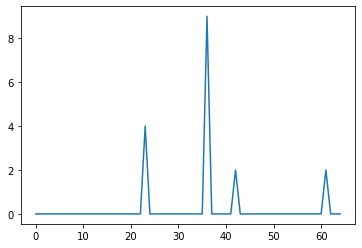

In [29]:
#plot graph : conflict 전체 문장중 어떤 위치에서 등장하는지 시각적으로 확인

%matplotlib inline 
 
## matplotlib의 pyplot import
import matplotlib.pyplot as plt
## numpy random를 import
from numpy.random import randn
 
pd_sum.plot()
 


(array([61.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <BarContainer object of 20 artists>)

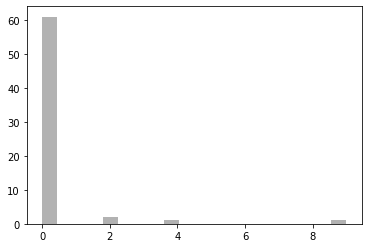

In [30]:
#Histogram

%matplotlib inline 
 
## matplotlib의 pyplot import
import matplotlib.pyplot as plt
## numpy random를 import
from numpy.random import randn
 
fig = plt.figure()
 
ax = fig.add_subplot(1,1,1)
ax.hist(pd_sum, bins=20, color='k', alpha=0.3)




In [26]:
def Conflict(input_text):
    contents = str(input_text)

    token_list_str = text_to_word_sequence(contents) #tokenize

    confict_words_list = ['clash', 'incompatible', 'inconsistent', 'incongruous', 'opposition', 'variance','vary', 'odds', 
                            'differ', 'diverge', 'disagree', 'contrast', 'collide', 'contradictory', 'incompatible', 'conflict',
                            'inconsistent','irreconcilable','incongruous','contrary','opposite','opposing','opposed',
                            'antithetical','clashing','discordant','differing','different','divergent','discrepant',
                            'varying','disagreeing','contrasting','at odds','in opposition','at variance' ]

    count_conflict_list = []
    for i in token_list_str:
        for j in confict_words_list:
            if i == j:
                count_conflict_list.append(j)
    
    conflict_words_no = len(count_conflict_list)#한 문장에 들어있는 conflict 단어 수
    ###############################################################################

    list_str = contents.split(".")  #문장별로 분리한다. 분리는 .를 기준으로 한다.   

    listSentiment = []

    sid = SentimentIntensityAnalyzer()

    i=0
    for sentence in tqdm(list_str): #한문장식 가져와서 처리한다.
        ss = sid.polarity_scores(sentence) #긍정, 부정, 중립, 혼합점수 계산
        #print(ss.keys())
        #print('{}: neg:{},neu:{},pos:{},compound:{}'.format(i,ss['neg'],ss['neu'],ss['pos'],ss['compound']))
        #print('{}: neg:{}'.format(i,ss['neg']))
        i +=1
        listSentiment.append([ss['neg'],ss['neu'],ss['pos'],ss['compound']])

    listSentiment
    df = pd.DataFrame(listSentiment)
    df.columns = ['neg', 'neu', 'pos','compound']
    df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0  else 'neg')
    df['comp_score'].value_counts()
    conflict_ratio = df['comp_score'].value_counts(normalize=True) #상대적 비율 계산

    return conflict_words_no, conflict_ratio


# ##### 이하 코드는 개별코드 테스트를 위해서 작성한 것임. 서버에 적용할때는 주석처리
# #### test...

# text = """A window into the soul.For most people, this would be the eyes. The eyes cannot lie; they often tell more about a person's emotions than their words. What distinguishes a fake smile from a genuine one? The eyes. What shows sadness? The eyes. What gives away a liar? The eyes.But are the eyes the only window into the soul?Recently, I began painting with watercolors. With watercolors, there is no turning back: if one section is too dark, it is nearly impossible to lighten the area again. Every stroke must be done purposefully, every color mixed to its exact value.I laid my materials before me, preparing myself for the worst. I checked my list of supplies, making sure my setup was perfect.I wet my brush, dipped it into some yellow ochre, and dabbed off the excess paint. Too little water on my brush. I dipped my brush back into my trusty water jar; the colors swirled beautifully, forming an abstract art piece before my eyes. \u2014It's a shame that I couldn't appreciate it.I continued mixing colors to their exact value. More alizarin crimson. More water. More yellow ochre. Less water. More phthalo blue. The cycle continued. Eventually, I was satisfied. The colors looked good, there was enough contrast between facial features, and the watercolors stayed inside the lines.Craving feedback, I posted my art to Snapchat. I got a few messages such as 'wow' and 'pretty,' but one message stood out. 'You were anxious with this one, huh? Anyways, love the hair!'I was caught off guard. Was it a lucky guess? Did they know something I didn't? I immediately responded: 'Haha, how could you tell?' No response.What I didn't know at the time was that my response would come a few months later while babysitting. Since the girl I was babysitting loved art, I took out some Crayola watercolors and some watercolor paper for her to play with. After I went to the bathroom and came back, the watercolors were doused with water. 'You were impatient with this one, huh? Anyways, love the little dog you drew!'The little girl looked up at me, confused. 'How could you tell?' 'You used a lot of water for a brighter color, but you couldn't wait for it to slowly soak in.''Oh.'Now, I would be lying if I said I realized the connection between the two events immediately.Instead, I made the connection when I decided to sit down one day and objectively critique my art. The piece that I once loved now seemed like a nervous wreck: the paper was overworked, the brushstrokes were undecided, the facial features blended together, and each drop of water was bound inside the lines as if it was a prisoner in a cage.From then on, I started noticing pieces of personality in additional creations surrounding me: website designs, solutions to math problems, code written for class, and even the preparation of a meal.When I peer around at people's projects during Code Club, I notice the clear differences between their code. Some people break it up by commenting in every possible section. Others breeze through the project, not caring to comment or organize their code. I could also see clear differences in personalities when our club members began coding the Arduino for the first time. Some followed the tutorials to the letter, while others immediately started experimenting with different colored LEDs and ways of wiring the circuit.It became clear to me that, as humans, we leave pieces of our souls in everything we do, more than we intend to. If we entertain this thought, perhaps the key to better understanding others around us is simply noticing the subtler clues under our noses?Perhaps there are endless windows to the soul, and we simply need to peer through them. I shakily rose my hand. 'We should create workshops of our own,' I suggested.I got a few strange looks. 'It's a good idea, but it's too much work.' 'We just don't have enough free time to make it work.' 'Maybe we could, but I don't know how to make workshops.' My suggestion was shot down. I shuffled in my seat. 'I could make them.' A few people stared at me in disbelief. I glanced over at the club advisor, Mr. C, nervous to hear his response.'If you're willing to take on the work, we can try it.' Mr. C replied. And so I embarked on my quest. I researched different workshops on the internet, learning the information myself at first. Then, I transitioned into creating workshops of my own, making sure that the information was easy to understand for even a beginner. I was exhausted; my first workshop took 16 cumulative hours to create."""

# print (Conflict(text))

In [27]:
Conflict(text)

100%|██████████| 65/65 [00:00<00:00, 5924.93it/s]


(3,
 pos    0.8
 neg    0.2
 Name: comp_score, dtype: float64)